https://drive.google.com/file/d/1y0r1ES3krzQ5wf1ezLdRj7Vcn7JG4UlF/view?usp=sharing


# YOLOv8 훈련하기

# 설정

In [2]:
import glob
import cv2
import random
import yaml

import ultralytics
from ultralytics import YOLO
from IPython.display import Image

# 데이터셋 확인
dataset을 저장할 폴더를 만들고 그곳으로 들어갑니다

In [3]:
# 이미지 파일 경로를 가져오기
image_paths = glob.glob('./my_data/test/images/*.jpg')

# 이미지가 없는 경우 에러 처리
if not image_paths:
    print("이미지 파일이 없습니다.")
else:
    # 랜덤하게 이미지 선택
    selected_image_path = random.choice(image_paths)

    # 이미지 표시
    img = cv2.imread(selected_image_path)
    print(img.shape)
    cv2.imshow('random img', img)

cv2.waitKey()
cv2.destroyAllWindows()

(250, 250, 3)


# YAML 파일 생성

새로운 yaml파일을 만들고 train, val, test 데이터셋 경로가 올바른게 작성해줘야 합니다



```
변경전                       변경후
train: ../train/images  ->  'train' : './train/images'
```



In [4]:
data = {'train' : 'C:/rokey_files/project_turtlebot/custom_yolo/my_data/train/images',
        'test' : 'C:/rokey_files/project_turtlebot/custom_yolo/my_data/test/images',
        'val' : 'C:/rokey_files/project_turtlebot/custom_yolo/my_data/valid/images',
        'nc': 2,
        'names': ['Car', 'Box']}

with open('./my_data/custom_data.yaml', 'w') as f:
  yaml.dump(data, f)

custom_data.yaml 파일을 만들었으니 제대로 작성이 되었는지 확인합니다

In [5]:
with open('./my_data/custom_data.yaml', 'r') as f:
  view_yaml = yaml.safe_load(f)
  display(view_yaml)

{'names': ['Car', 'Box'],
 'nc': 2,
 'test': 'C:/rokey_files/project_turtlebot/custom_yolo/my_data/test/images',
 'train': 'C:/rokey_files/project_turtlebot/custom_yolo/my_data/train/images',
 'val': 'C:/rokey_files/project_turtlebot/custom_yolo/my_data/valid/images'}

# YOLOv8 설치, 확인

yolov8이 제대로 설치가 되었는지 확인합니다

In [34]:
ultralytics.checks()

Ultralytics 8.3.202  Python-3.13.5 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
Setup complete  (12 CPUs, 15.1 GB RAM, 437.1/999.2 GB disk)


사전에 학습된 yolov8n.pt를 가져오고 적용시킵니다

yolov8의 학습파일은 yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt 등이 있습니다

In [35]:
model = YOLO('yolov8n.pt')

yolov8에서 사용하는 model이 yolov8n.pt 인지 확인해봅니다

yolov8은 cocodata의 분류를 가져서 80개의 name이 저장되어있습니다

In [36]:
print(type(model.names),len(model.names))

display(model.names)

<class 'dict'> 80


{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

우리가 원하는 데이터셋 경로를 가진 custom_data.yaml을 가지고 학습을 시작합니다

In [38]:
results = model.predict('https://ultralytics.com/images/bus.jpg', save=True, show=True)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 c:\rokey_files\project_turtlebot\custom_yolo\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to C:\rokey_files\project_turtlebot\custom_yolo\runs\detect\predict3


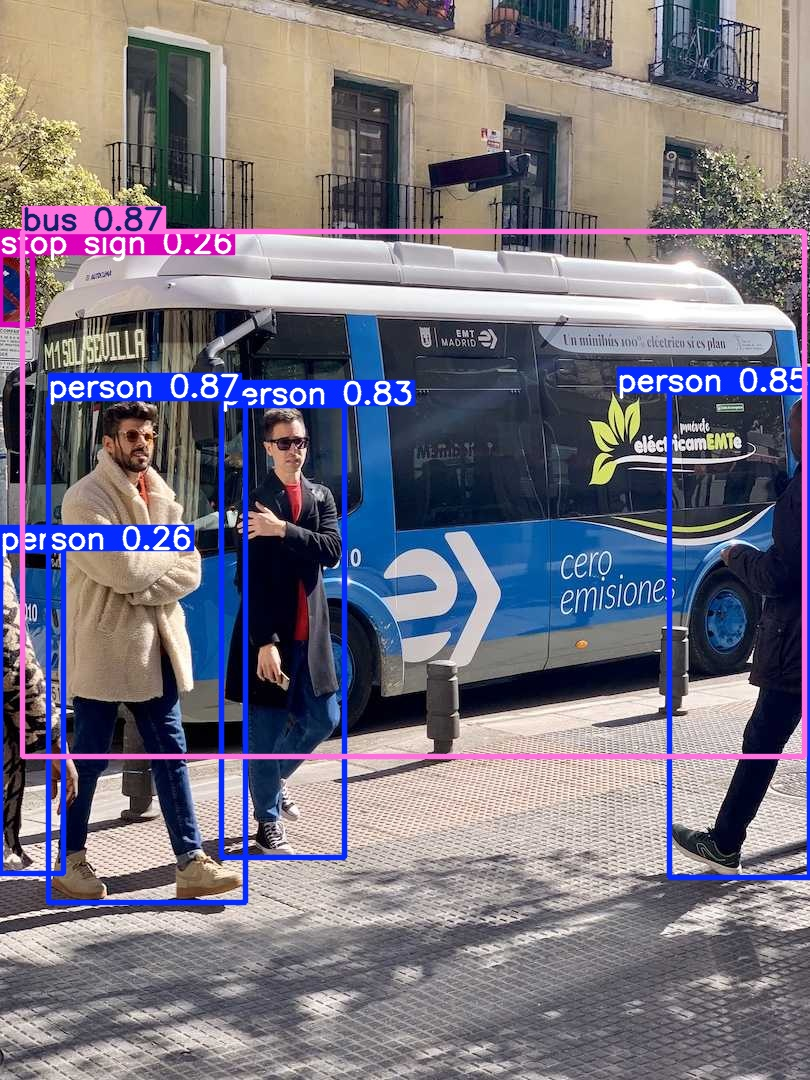

In [39]:
Image(filename='./runs/detect/predict/bus.jpg',width=1000)

# 학습

In [ ]:
model.train(data='./my_data/custom_data.yaml', epochs = 100, patience = 20, batch=32, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.228 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.202  Python-3.13.5 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./my_data/custom_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=Fal

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000202F4AB4910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

학습한 결과 분석은 다음경로에 새롭게 저장되었습니다

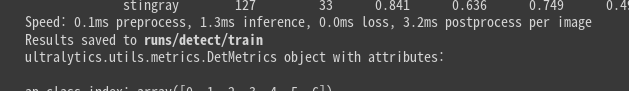

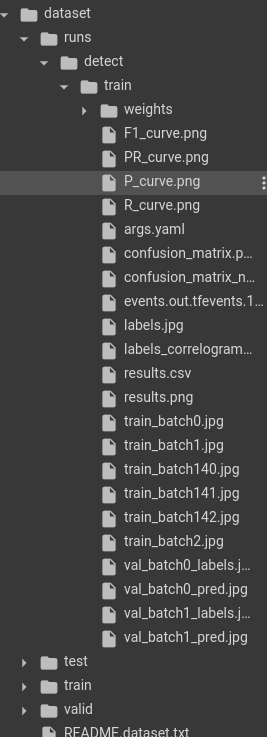

# 결과 확인

학습한 모델은 weights/best.pt 로 저장되어있습니다

yolov8은 학습하고 나서 자동적으로 모델을 변경합니다

실제로 변경되는지 확인합니다

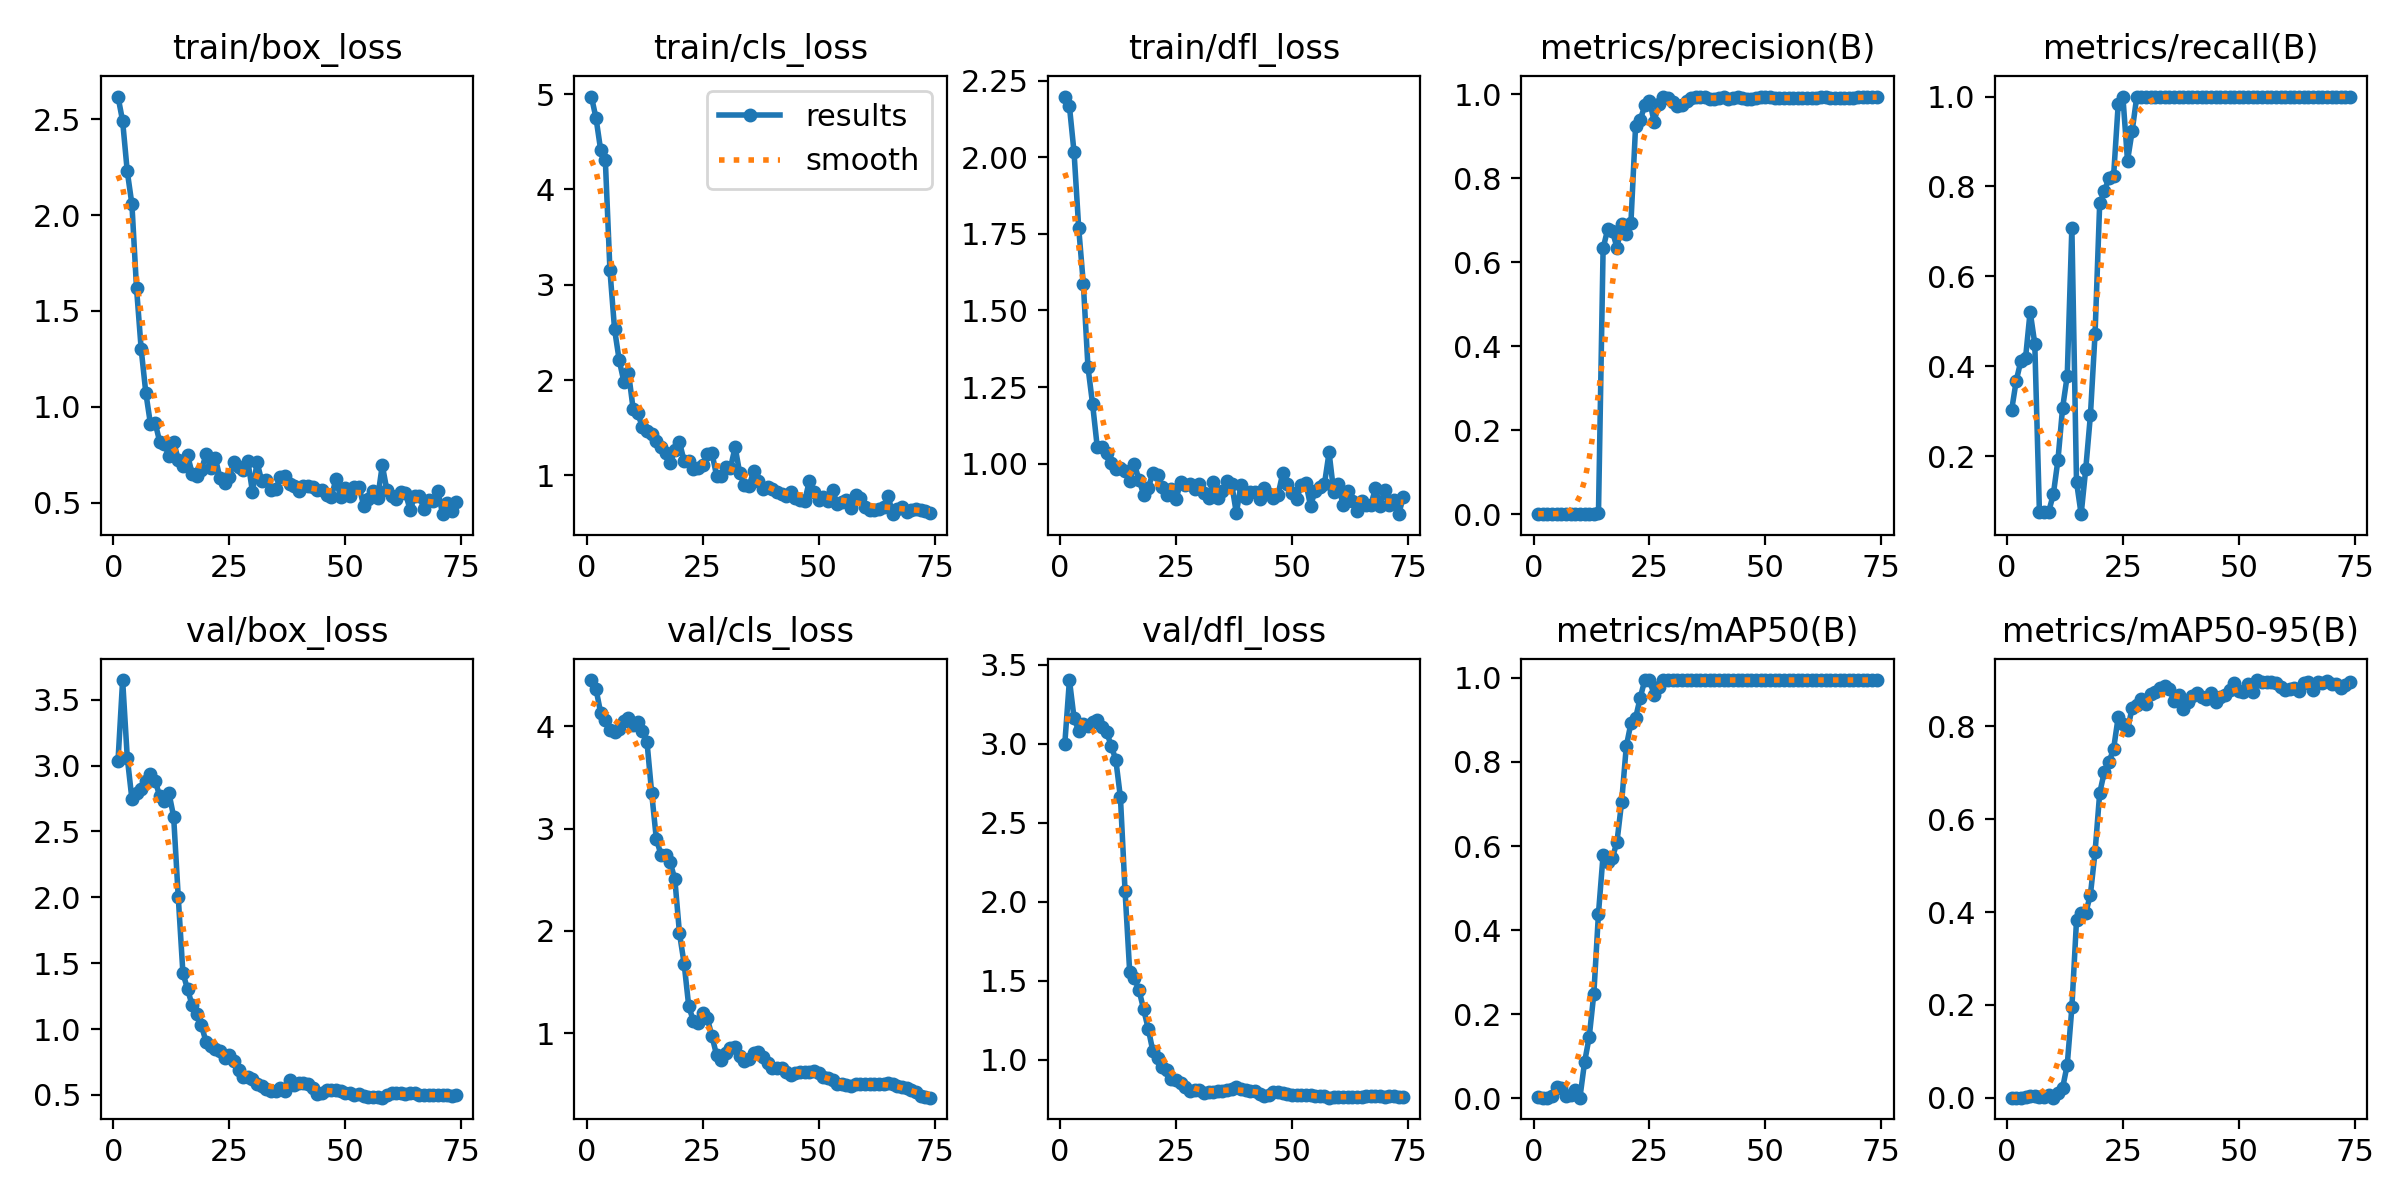

In [13]:
Image(filename='./runs/detect/train/results.png',width=1000)

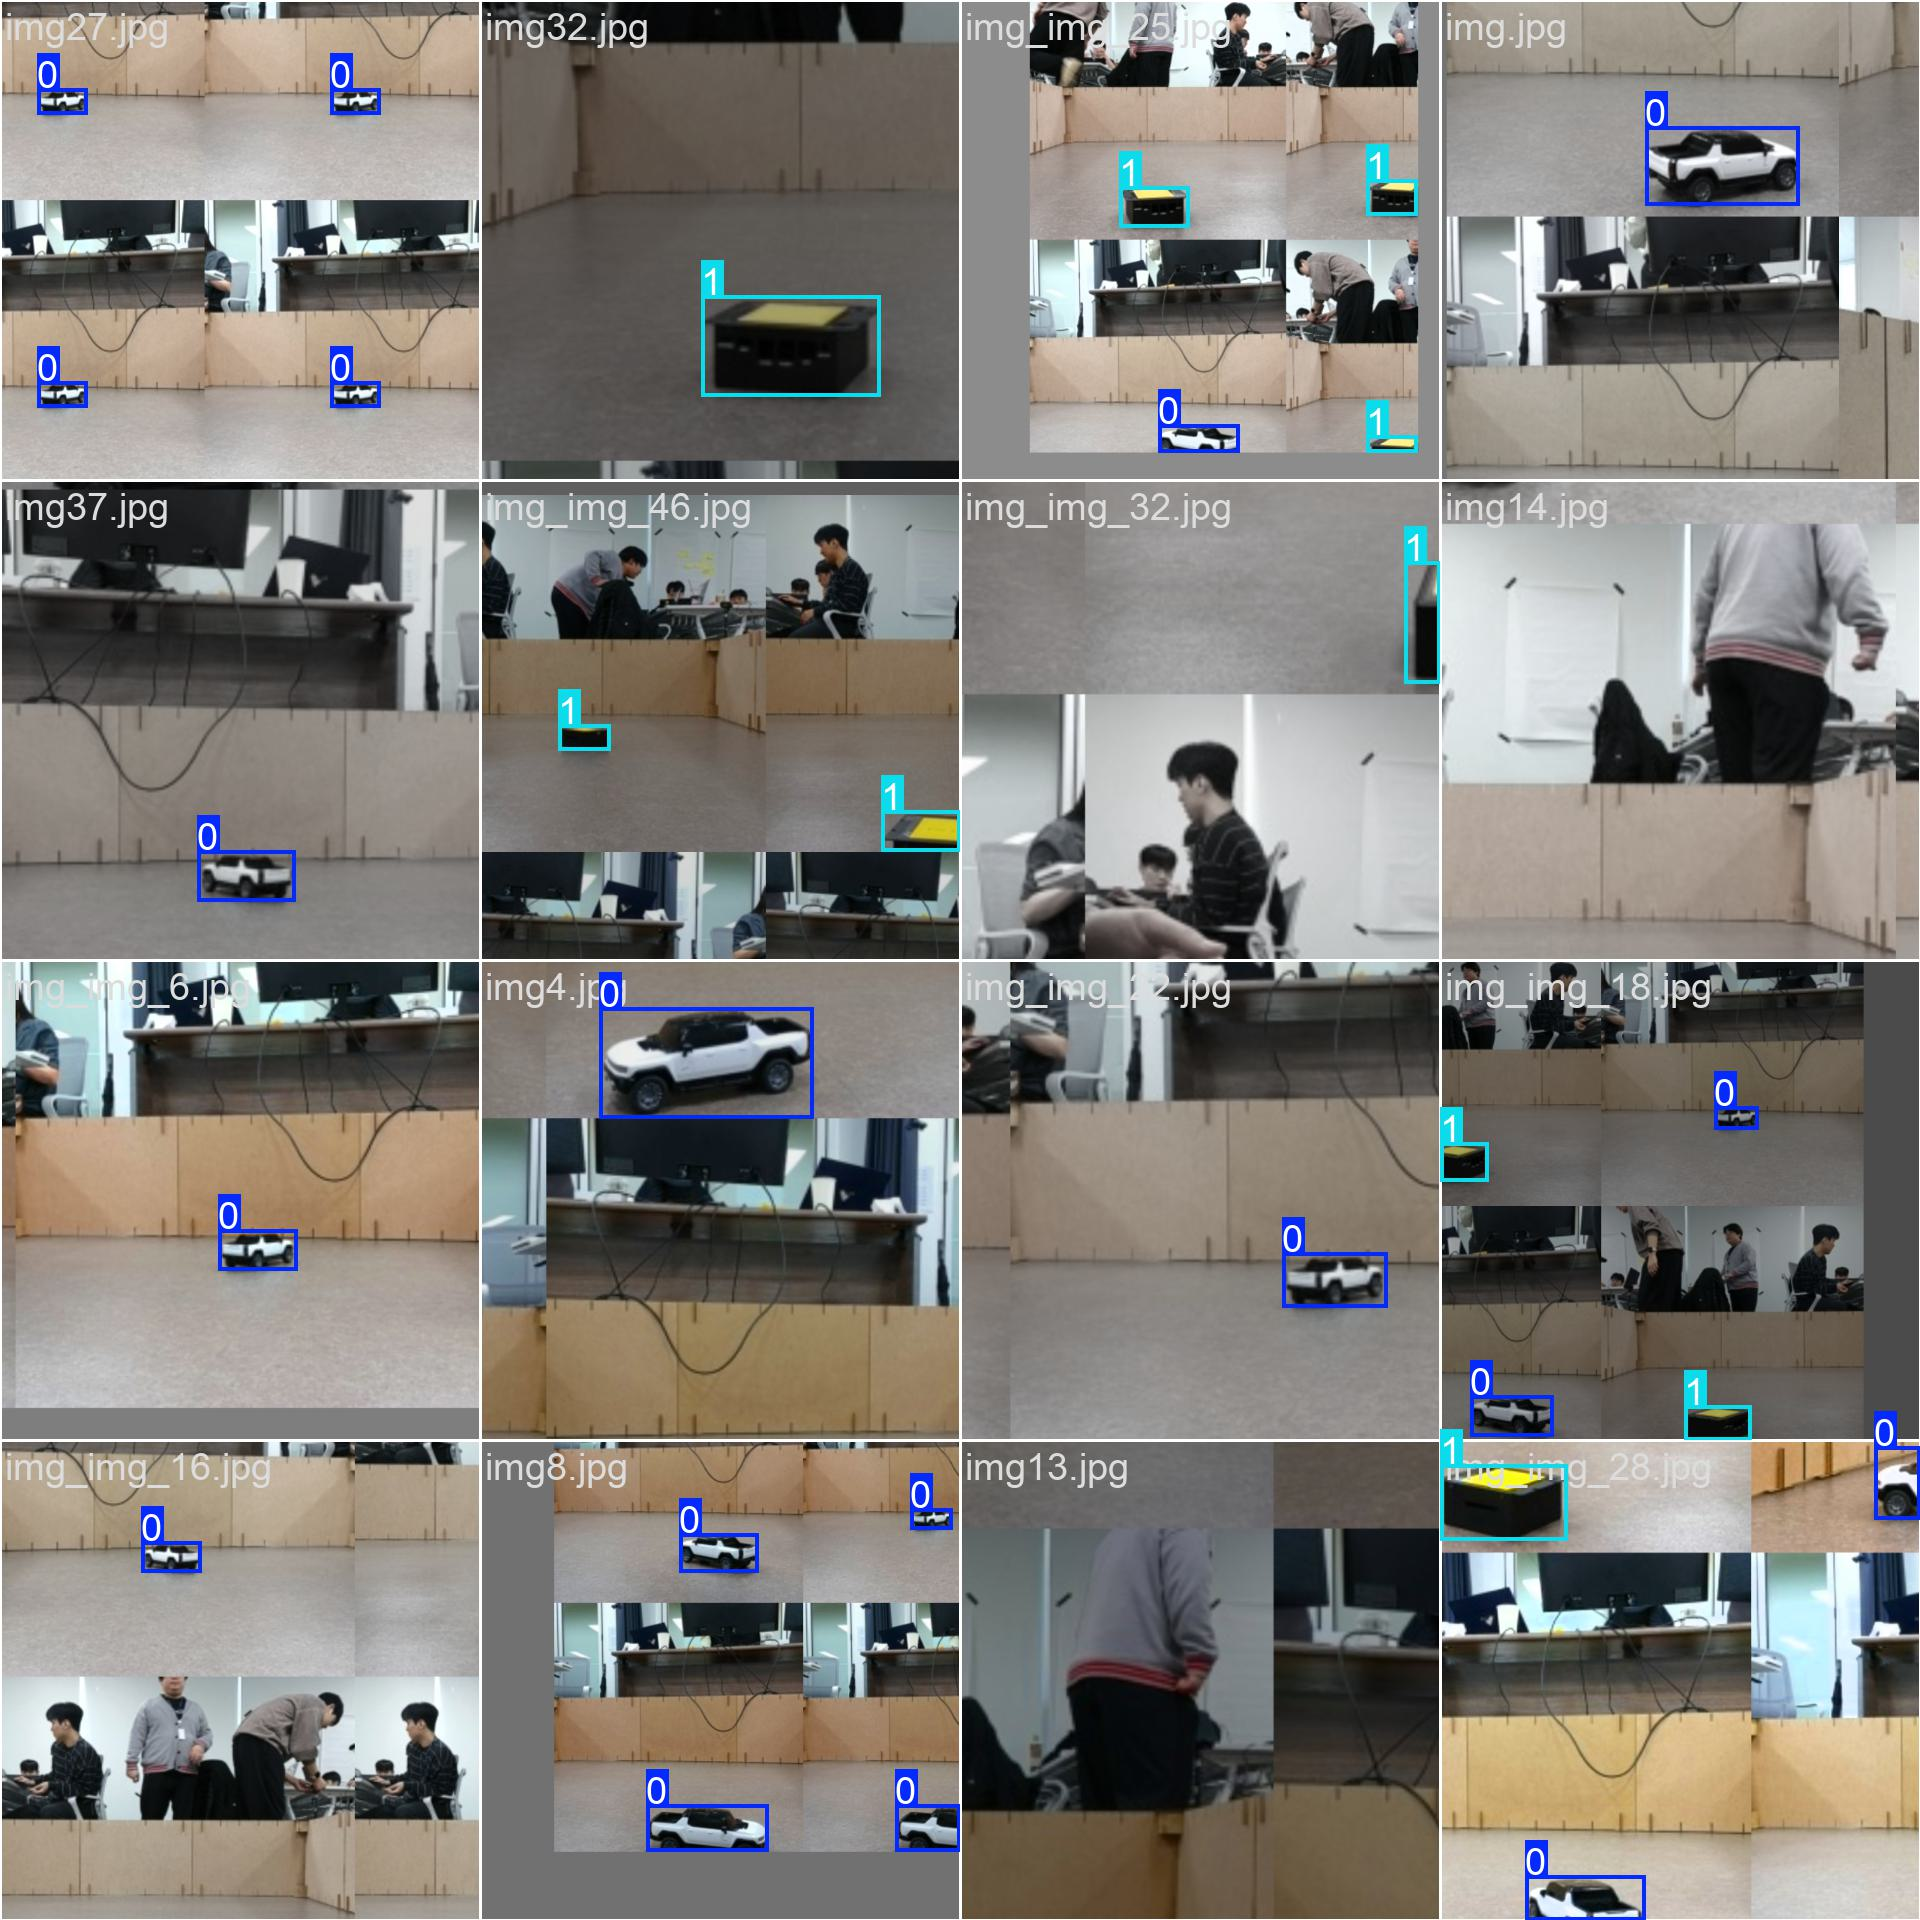

In [14]:
Image(filename='./runs/detect/train/train_batch0.jpg',width=1000)

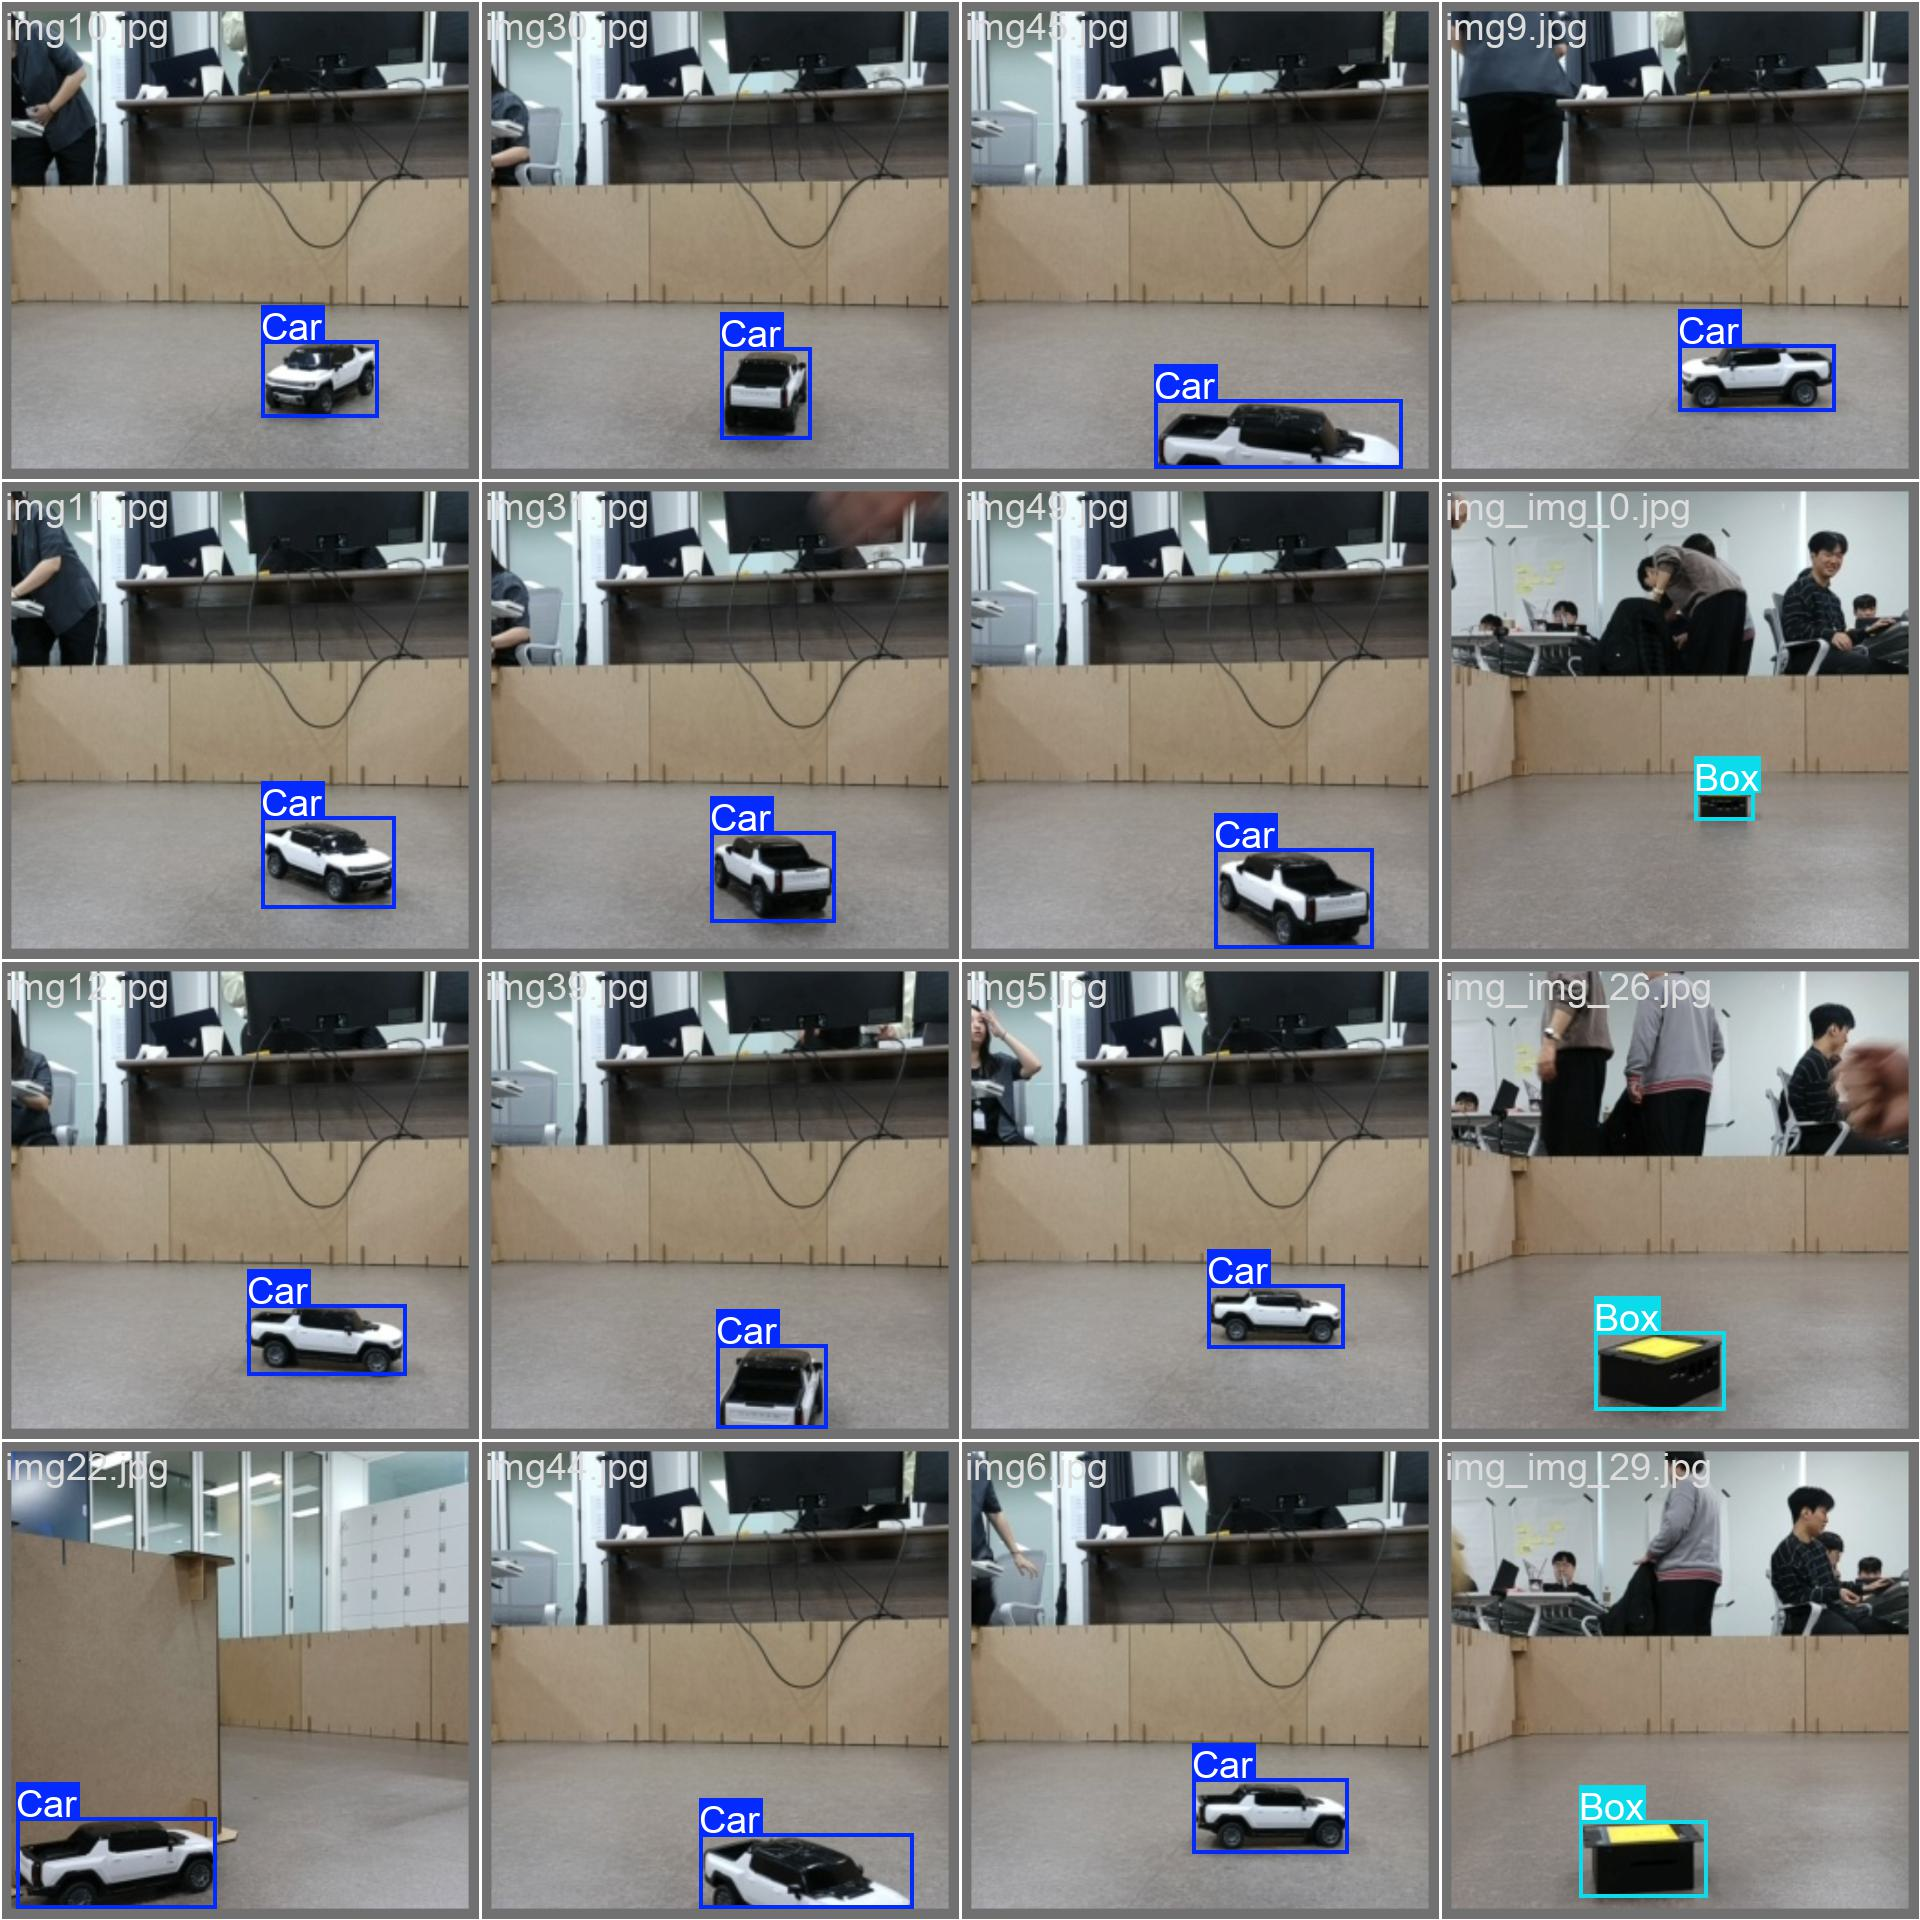

In [15]:
Image(filename='./runs/detect/train/val_batch0_labels.jpg',width=1000)

In [16]:
print(type(model.names),len(model.names))

print(model.names)

<class 'dict'> 2
{0: 'Car', 1: 'Box'}


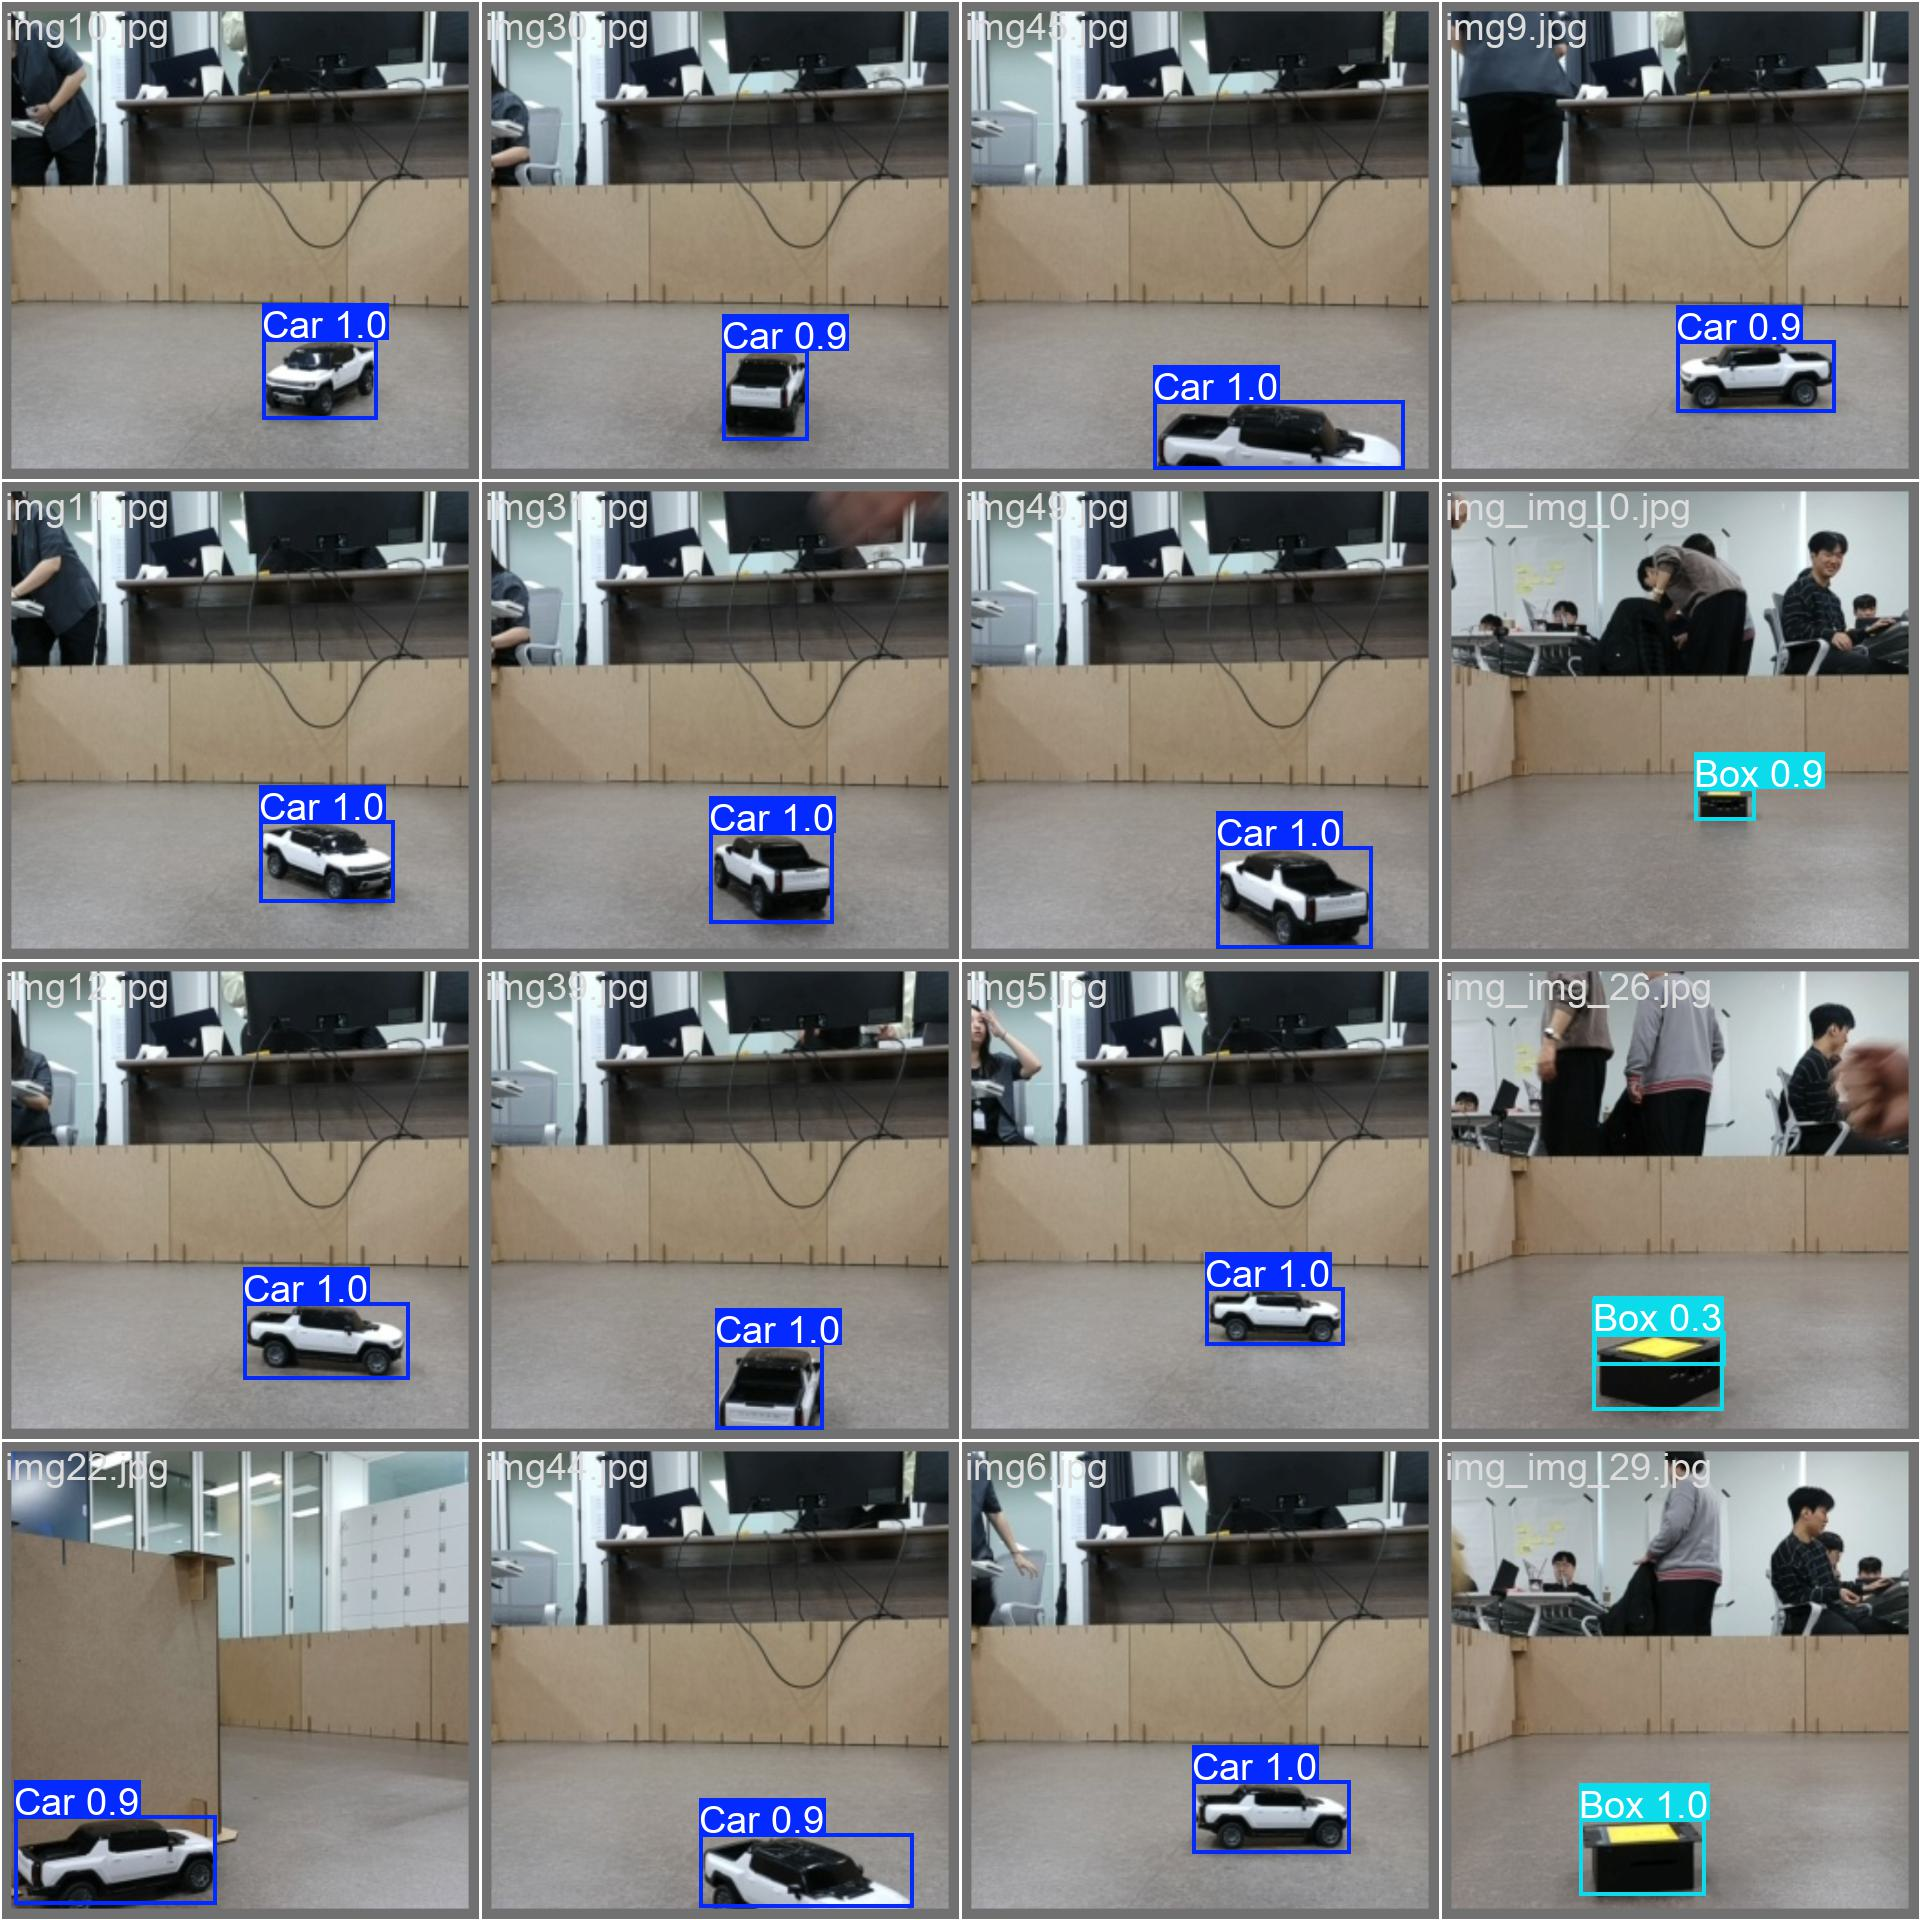

In [17]:
Image(filename='./runs/detect/train/val_batch0_pred.jpg',width=1000)

# 학습된 사진 출력

학습된 결과물을 출력하는 부분입니다

마지막 출력문인 'Results saved to '이후에 나오는 경로가 학습된 이미지 출력이 있는 폴더의 경로입니다

image.png

In [18]:
model = YOLO('./runs/detect/train/weights/best.pt')

In [19]:
print(type(model.names),len(model.names))

print(model.names)

<class 'dict'> 2
{0: 'Car', 1: 'Box'}


In [21]:
# 테스트 이미지
test_image_list = glob.glob('./test/images/*')

print(len(test_image_list))

test_image_list.sort()

for i in range(len(test_image_list)):
    print('i = ',i, test_image_list[i])

0


In [ ]:
results = model.predict(source ='./my_data/test/images/', save=True)


image 1/11 c:\rokey_files\project_turtlebot\custom_yolo\my_data\test\images\img17.jpg: 640x640 1 Car, 18.4ms
image 2/11 c:\rokey_files\project_turtlebot\custom_yolo\my_data\test\images\img19.jpg: 640x640 1 Car, 15.0ms
image 3/11 c:\rokey_files\project_turtlebot\custom_yolo\my_data\test\images\img36.jpg: 640x640 1 Car, 18.6ms
image 4/11 c:\rokey_files\project_turtlebot\custom_yolo\my_data\test\images\img38.jpg: 640x640 1 Car, 16.6ms
image 5/11 c:\rokey_files\project_turtlebot\custom_yolo\my_data\test\images\img_img_2.jpg: 640x640 1 Box, 18.7ms
image 6/11 c:\rokey_files\project_turtlebot\custom_yolo\my_data\test\images\img_img_33.jpg: 640x640 1 Box, 14.6ms
image 7/11 c:\rokey_files\project_turtlebot\custom_yolo\my_data\test\images\img_img_34.jpg: 640x640 1 Box, 14.8ms
image 8/11 c:\rokey_files\project_turtlebot\custom_yolo\my_data\test\images\img_img_36.jpg: 640x640 1 Box, 12.5ms
image 9/11 c:\rokey_files\project_turtlebot\custom_yolo\my_data\test\images\img_img_37.jpg: 640x640 1 Box, 1

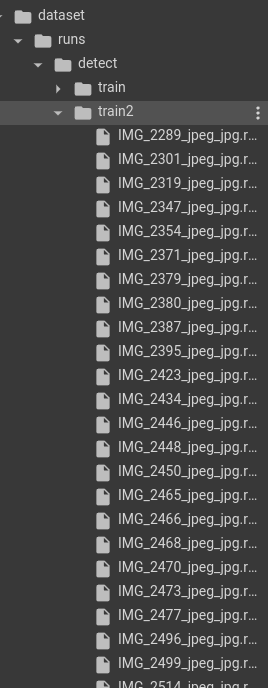

해당 경로에서 랜덤으로 이미지 출력을 보는 코드입니다

colab은 특수한 패키지를 사용해야 볼 수 있습니다

In [31]:
# 이미지 파일 경로를 가져오기
image_paths = glob.glob('./runs/detect/predict/*.jpg')

# 이미지가 없는 경우 에러 처리
if not image_paths:
    print("이미지 파일이 없습니다.")
else:
    # 랜덤하게 이미지 선택
    selected_image_path = random.choice(image_paths)
    # 이미지 표시
    img = cv2.imread(selected_image_path)

    for image_path in image_paths:
    #   img = cv2.imread(image_path)
      cv2.imshow("Img", img)

cv2.waitKey()
cv2.destroyAllWindows()